<a href="https://colab.research.google.com/github/AhmadNazmiZayuri/DataScience/blob/main/Project_2_P146217_HIV_Prevalance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

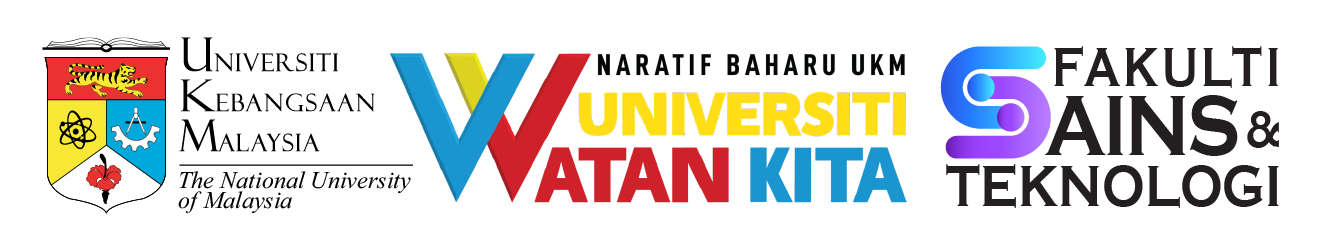

# Project 2
## **STQD6014 Data Science Semester 1 2024/2024**
*Ahmad Nazmi bin Zayuri (P146217)*

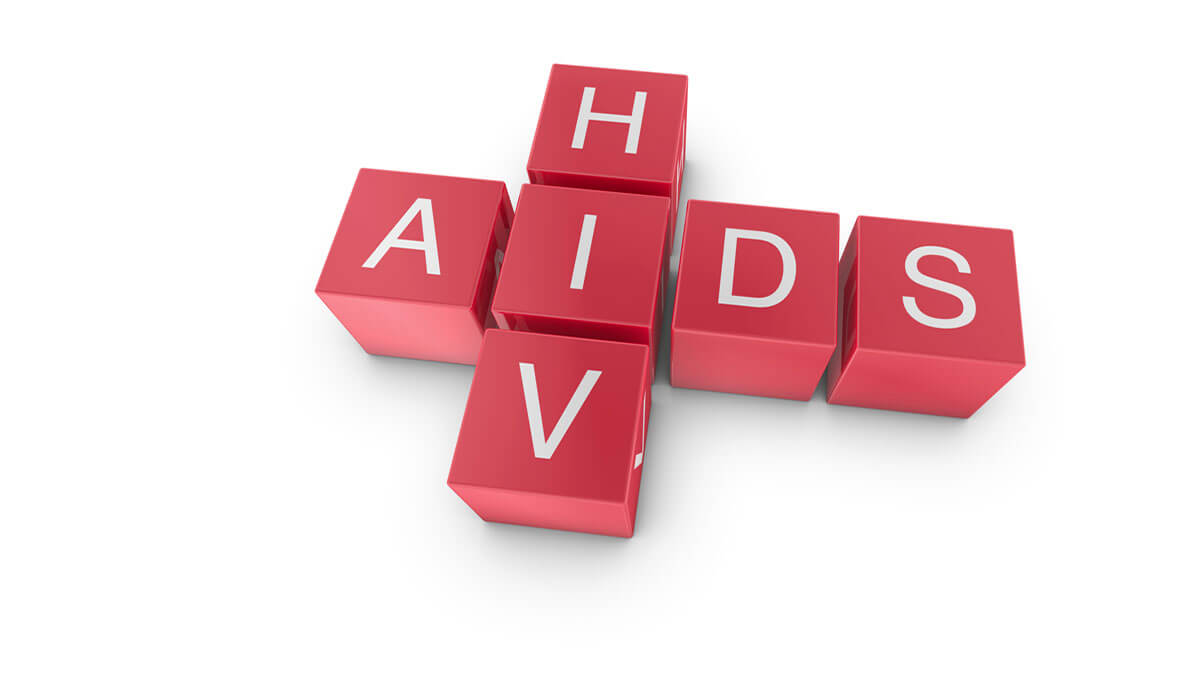

#INTRODUCTION

##**HIV: Understanding the Virus**

###What is HIV?
HIV (Human Immunodeficiency Virus) is a virus that attacks the body's immune system, specifically targeting CD4 cells (T cells), which are vital for fighting infections.

###Why is it Serious?
If left untreated, HIV can progress to AIDS (Acquired Immunodeficiency Syndrome), a condition where the immune system is too weak to defend against infections and diseases.

###Management and Hope
While there is no cure for HIV, antiretroviral therapy (ART) can:

*   Suppress the virus effectively.
*   Help individuals lead long, healthy lives.

###Prevention is Key



1.   Practice Safe Behaviors: Use protection during sexual activities.
2.   Regular Testing: Know your status and encourage others to do the same.
3.   Awareness: Promote understanding and reduce stigma.








#PROBLEM STATEMENT


HIV/AIDS is a persistent global health issue. HIV/AIDS prevalence, the number of people dying due to AIDS, and the number of people living with HIV are different across various regions and countries. In order to understand what affects the spread of this virus and its impact, it is vital to outline the links between these variables. This analysis seeks to answer the following questions:

* What is the relationship between HIV prevalence, the number of people living with HIV, and annual deaths from HIV/AIDS?
* Which countries or regions have the highest prevalence and are most affected by HIV/AIDS, and what are the inequalities between countries?
* How do prevalence rates correspond to the absolute numbers of people infected, and what does that say about population-level risks?
* How do the countries with the highest prevalence balance the burden of people living with HIV and the annual deaths, and what are the implications for intervention strategies?

This study will employ statistical and visual analytics to find out the trend, correlation, and disparity in HIV prevalence and its impact. It is expected that the result will provide actionable insight into global and regional public health strategies.

#**RESULT & DISCUSSION**

###The data gotten is from web mining a wiki page titled HIV Adult prevalance 'https://en.wikipedia.org/wiki/HIV_adult_prevalence_rate'
#**First we import the necessary packages and tools**
The function of the packages is mentioned with it

In [2]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For statistical data visualization

In [ ]:
#Download the raw data
#Download data here: 'https://github.com//AhmadNazmiZayuri//DataScience//blob//main//AIDS_Data.csv?raw=true'
#Download data here: 'https://drive.google.com//uc?export=download&id=14zboTKmcJ7EMMRpsoWmwHWyLCgnm4qFq'

In [3]:
#Also can immediately run this code for raw data
#Define the data
#Have to mention encoding type since use different encoding than the default
hivdata=pd.read_csv("https://github.com//AhmadNazmiZayuri//DataScience//blob//main//AIDS_Data.csv?raw=true",encoding="latin-1",delimiter=';')

In [4]:
#Check sample of data
print(hivdata)

             Country/Region, Adult prevalence Number of people  \
0                        NaN     of HIV/AIDS,   with HIV/AIDS,   
1                   Eswatini           28.30%          240,000   
2                    Lesotho           24.10%          403,000   
3                   Botswana           22.60%          398,500   
4                   Zimbabwe           22.10%        1,660,000   
..                       ...              ...              ...   
183                 Mongolia                -            2,500   
184   British Virgin Islands                -               48   
185           American Samoa                -              110   
186                    Nauru                -              270   
187         Marshall Islands                -               19   

      Annual deaths Year of estimate,,  
0    from HIV/AIDS,                NaN  
1             3,000              2024,  
2             5,380              2024,  
3             5,240              2024,  
4 

##Column Descriptors
* Country/Region: The geographical area being analyzed.
* Adult Prevalence (%): Percentage of adults aged 15–49 living with HIV.
* Number of People with HIV/AIDS: Absolute count of individuals living with HIV in the region.
* Annual Deaths from HIV/AIDS: Number of deaths attributed to HIV/AIDS annually.
* Year of Estimate: The year when the data was collected or estimated.

In [5]:
#Check for any missing data
hivdata.isnull()

,"Country/Region,",Adult prevalence,Number of people,Annual deaths,"Year of estimate,,"
0,True,False,False,False,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
183,False,False,False,False,False
184,False,False,False,False,False
185,False,False,False,False,False
186,False,False,False,False,False


### <font color='red'>**So what does the output above mean?**
<font color='red'>- expand a little bit more to guide the readers how to read the output

##**Cleaning Data**

In [6]:
# Remove first row
hivdata=hivdata.iloc[1:,:]
print(hivdata)

             Country/Region, Adult prevalence Number of people Annual deaths  \
1                   Eswatini           28.30%          240,000         3,000   
2                    Lesotho           24.10%          403,000         5,380   
3                   Botswana           22.60%          398,500         5,240   
4                   Zimbabwe           22.10%        1,660,000        25,600   
5               South Africa              14%        9,230,000        77,000   
..                       ...              ...              ...           ...   
183                 Mongolia                -            2,500             -   
184   British Virgin Islands                -               48             -   
185           American Samoa                -              110             -   
186                    Nauru                -              270             -   
187         Marshall Islands                -               19             -   

    Year of estimate,,  
1             

### <font color='red'>**Please explain your justification to remove the first row...WHY?**

In [7]:
# Assign correct column names
hivdata.columns = ['Country/Region', 'Adult Prevalence (%)', 'Number of People with HIV/AIDS',
                'Annual Deaths from HIV/AIDS', 'Year of Estimate']
hivdata.sample(7)

,Country/Region,Adult Prevalence (%),Number of People with HIV/AIDS,Annual Deaths from HIV/AIDS,Year of Estimate
116,Morocco,-,-,-,"2016,,,"
14,Togo,5.20%,"220,440","6,600","2024,"
80,Bolivia,0.40%,"24,000",-,"2023,,"
42,Mali,1.20%,"140,000","5,800","2016,"
125,Sri Lanka,-,"4,000",-,"2016,,"
44,Thailand,1.31%,"800,000","25,000","2024,"
111,Albania,0.10%,"1,700",-,"2016,,"


In [8]:
for col in ['Adult Prevalence (%)', 'Number of People with HIV/AIDS', 'Annual Deaths from HIV/AIDS']:
    # Remove percentage sign and commas first
    hivdata.loc[:, col] = hivdata[col].str.replace('%', '', regex=False).str.replace(',', '', regex=False)

    # Convert the cleaned column to numeric, invalid parsing will return 0
    hivdata[col] = pd.to_numeric(hivdata[col], errors='coerce').fillna(0)

    hivdata.loc[:, col] = hivdata[col].fillna(0)


# Display a sample of the cleaned data
hivdata.sample(7)


,Country/Region,Adult Prevalence (%),Number of People with HIV/AIDS,Annual Deaths from HIV/AIDS,Year of Estimate
152,Mauritius,0.16,0.0,0.0,"2022,,"
43,Trinidad and Tobago,1.20,11000.0,0.0,"2016,,"
185,American Samoa,0.00,110.0,0.0,"2023,,,"
6,Namibia,13.20,219330.0,3880.0,"2024,"
78,Senegal,2.30,54000.0,5100.0,"2024,"
74,Costa Rica,0.40,13000.0,0.0,"2016,,"
142,Turks and Caicos Islands,0.00,0.0,0.0,"2023,,,"


In [9]:
# Convert year column to integer
# Remove bracketed numbers, such as "[13]" or "[25]"
hivdata.loc[:, "Year of Estimate"] = hivdata["Year of Estimate"].str.replace(r"\[\d+\]", "", regex=True)

# Remove other unwanted characters like commas and spaces
hivdata.loc[:, "Year of Estimate"] = hivdata["Year of Estimate"].str.replace(r"[, ]", "", regex=True)

# Convert the cleaned column to integer
hivdata["Year of Estimate"] = hivdata["Year of Estimate"].astype(int)

# Display a sample of the cleaned data
hivdata.sample(7)


,Country/Region,Adult Prevalence (%),Number of People with HIV/AIDS,Annual Deaths from HIV/AIDS,Year of Estimate
21,Rwanda,2.90,230000.0,2800.0,2016
86,Laos,0.30,11000.0,0.0,2016
32,Saint Vincent and the Grenadines [9],1.60,860.0,0.0,2023
29,Ghana,2.00,361897.0,22000.0,2024
134,Montenegro,0.12,401.0,0.0,2023
70,Malaysia,0.30,110000.0,7400.0,2024
34,Liberia,1.50,50000.0,2300.0,2023


In [10]:
#check for null values
hivdata.isnull().sum()

,0
Country/Region,0
Adult Prevalence (%),0
Number of People with HIV/AIDS,0
Annual Deaths from HIV/AIDS,0
Year of Estimate,0


In [11]:
#To confirm type of data
hivdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 1 to 187
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country/Region                  187 non-null    object 
 1   Adult Prevalence (%)            187 non-null    float64
 2   Number of People with HIV/AIDS  187 non-null    float64
 3   Annual Deaths from HIV/AIDS     187 non-null    float64
 4   Year of Estimate                187 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 7.4+ KB


### <font color='red'>**Are the data types above conform to your expectation?**
<font color='red'>**- make some explanation here**

##**Graph and Analysis**

##Chart Pie of Year Estimate


Year of Estimate
2024    66
2016    48
2023    46
2022     8
2018     7
2019     7
2021     4
2013     1
Name: count, dtype: int64


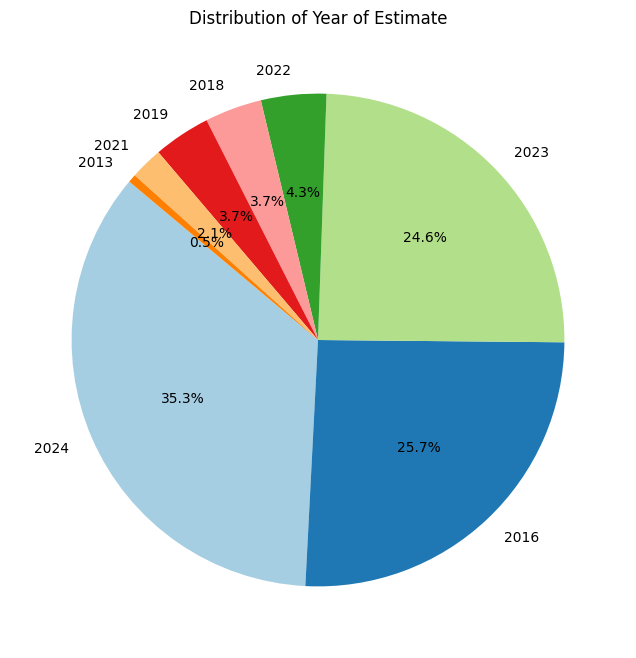

In [12]:
# Numerical Analysis
year_counts = hivdata['Year of Estimate'].value_counts()
print(year_counts)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Year of Estimate')
plt.show()

This analysis show the year where the data was collected and estimated.
35.3% or 66 is collected in 2024 where this is the latest year for data collection.
24.6% or 46 is collected in 2023 where this is the second latest year for data collection.
40.1% or 75 is collected later than 2023.

<font color='red'>**Comments:**

<font color='red'>**1. What does '66' represent? Does it refer to 66 data points?**

<font color='red'>**2. Similarly, what do '46' and '75' represent? Please clarify the meaning of these numbers.**


###Year 2024

This means that a lot of effort is put into updating and gathering HIV prevalence data.
This emphasis on 2024 indicates a strong commitment to keeping data current, which is crucial for proper policymaking, resource allocation, and tracking progress toward global HIV/AIDS goals.

###Year 2023

Although slightly older than the 2024 data, it still represents recent work.
The remarkable percentage of records from 2023 illustrates continuity in HIV prevalence monitoring, guaranteeing that there are no substantial data gaps between years.

###Year before 2023

Historic data are important for recognizing past trends and informing longitudinal studies.
While older data may not reflect current HIV prevalence levels, it is nevertheless helpful for assessing changes over time and finding long-term patterns.

##**Implications for HIV prevalence analysis**

###Focus on recent data from 2024 and 2023.


The later two years (2023 and 2024) account for 59.9% of the estimates. This is significant because it enables for evaluation of current public health needs and connects activities with the most recent epidemiological situation. This provides insights into current epidemiological trends, allowing for timely actions. In 2024, over 150 countries provided HIV monitoring data, allowing for more accurate decision-making and resource allocation. For more information, see the UNAIDS 2023 and 2024 reports.

<font color='red'>**Comments:**

<font color='red'>**1. The statement "In 2024, over 150 countries provided HIV monitoring data" – where is this reflected in your data?**

<font color='red'>**2. The pie chart above shows only 66 data points for 2024. Could you clarify this discrepancy?**

<font color='red'>**3. The statement "For more information, see the UNAIDS 2023 and 2024 reports" – could you provide the links to these reports?**

###Importance of Historic Data Before 2023:

The past context is placed into perspective by 40.1% of earlier estimations.
This will also enable academics and policymakers to track development over time, identify pockets of lagging regions or people, and evaluate the efficacy of earlier efforts.

###Global country-level insights:

Because this data represents HIV prevalence at the country level, it sheds light on the pandemic's global trajectory. Data at the national level reveals high-incidence hotspots, effective interventions, and opportunities for improvement. UNAIDS's most recent updates establish an integrated strategy to global HIV programs that includes both current and historical data. Stakeholders will be able to identify countries with high incidence, growing trends, or successful mitigation initiatives by analyzing this data.

<font color='red'>**Comments:**

<font color='red'>**1. The statement "Data at the national level reveals high-incidence hotspots and effective interventions" - where is this information reflected in the data above?**

<font color='red'>**2. If this information is sourced from other references, please ensure to cite them clearly.**


###References
UNAIDS Reports:

https://www.unaids.org/sites/default/files/media_asset/data-book-2024_en.pdf

https://www.unaids.org/sites/default/files/media_asset/data-book-2023_en.pdf

<font color='red'>**Comments:**

<font color='red'>**1. You need to link the two reports mentioned above to the text in your write-up.**

<font color='red'>**2. This is called proper citation or referencing.**

<font color='red'>**3. You can use a numbered citation system to link the text to the two reports.**

##Correlation Heatmap of Adult Prevalance (%), Number of People with HIV/AIDS, Annual Death from HIV/AIDS

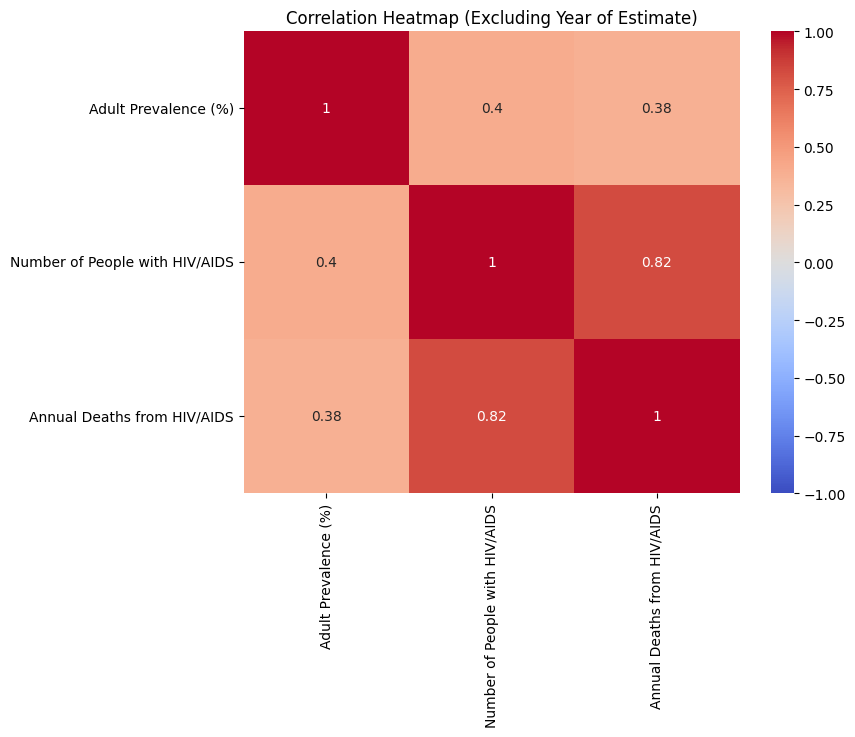

In [13]:
# Dropping non-numeric columns and the 'Year of Estimate' column for correlation calculation
numeric_data = hivdata[['Adult Prevalence (%)', 'Number of People with HIV/AIDS', 'Annual Deaths from HIV/AIDS']]

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Excluding Year of Estimate)')
plt.show()

This heatmap visualizes the correlations between three variables in the dataset:

* Adult Prevalence (%)
* Number of People with HIV/AIDS
* Annual Deaths from HIV/AIDS

The values in the heatmap indicate the strength and direction of the linear relationship between each pair of variables:

##**Adult Prevalence (%) vs. People Living with HIV/AIDS (correlation = 0.40)**

**Interpretation:**

This weak to moderate positive association indicates that as the proportion of adults with HIV/AIDS rises, so does the number of persons with HIV/AIDS, albeit not in a highly linear fashion. This might be because:

The overall population size varies significantly between countries. A smaller country with a greater adult prevalence may yet have fewer HIV/AIDS cases than a larger country with a lower prevalence rate.

Other demographic characteristics, such as age distribution and infection control efforts, could potentially influence this association.

**Insights:**

Prevalence measures the proportion of a population affected, whereas absolute numbers indicate the magnitude of the epidemic. When allocating resources for HIV/AIDS interventions, both must be considered. This relationship shows the variance in population sizes and HIV prevalence rates. UNAIDS predicts that the worldwide HIV/AIDS population will reach 39.9 million by 2023, despite efforts to prevent new infections. This growth is attributed in part to demographic changes and the use of ART, which reduces death while maintaining high prevalence rates due to better survival.

<font color='red'>**Comments:**

<font color='red'>**1. The statement "UNAIDS predicts that the worldwide HIV/AIDS population will reach 39.9 million by 2023" - please provide the source for this information.**

##**Adult Prevalence (%) vs. Annual Deaths from HIV/AIDS (correlation=0.38)**

**Interpretation:**

This weak to moderate positive connection would imply that a high adult prevalence loosely corresponds to a high annual death toll from HIV/AIDS; the relationship is fairly weak, which could be related to:

Quality of healthcare where some nations may have a high prevalence but low mortality rates due to quality healthcare and the availability of effective therapy, such as ART.

Socioeconomic factors, regardless of prevalence, may contribute to a greater death rate in some nations.

**Insights:**

Although mortality rates may not be perfectly correlated with prevalence rates, actions to reduce deaths (for example, expanding healthcare access) may differ from efforts to reduce prevalence. The relationship between prevalence and mortality highlights the importance of healthcare quality. Despite their high prevalence, countries with strong ART programs tend to have lower mortality rates. The disparity is accentuated by socioeconomic status, with less wealthy countries failing to afford adequate treatment.

##**Number of people with HIV/AIDS vs. Annual HIV/AIDS Deaths (correlation = 0.82)**

**Interpretation:**

A large HIV/AIDS-affected population is linked to higher annual HIV/AIDS mortality rates.
The more persons infected, the higher the risk of death, which is especially true in communities where treatment or intervention programs may be minimal or nonexistent.
The biggest number of deaths occur in countries with huge populations and high infection rates, such as Sub-Saharan Africa. <font color='red'>**(Please provide the source for this info).**

**Insights:**

A strong relationship like this may imply that reducing the total number of HIV/AIDS infections through prevention and treatment could have a considerable impact on mortality. It also underlines the significance of targeting interventions, particularly in areas with a large affected population. Most notably, the majority of people live in Sub-Saharan Africa, which accounts for around 70% of those living with HIV. While considerable progress has been made, the restricted access to healthcare and ART in these areas continues to lead to higher mortality rates.



###Refeerences:

https://www.unaids.org/sites/default/files/media_asset/UNAIDS_FactSheet_en.pdf

<font color='red'>**Comments: use a numbered citation system to link the text to the above pdf report.**

##Bar plot of top 10 countries with highest Adult HIV Prevelance

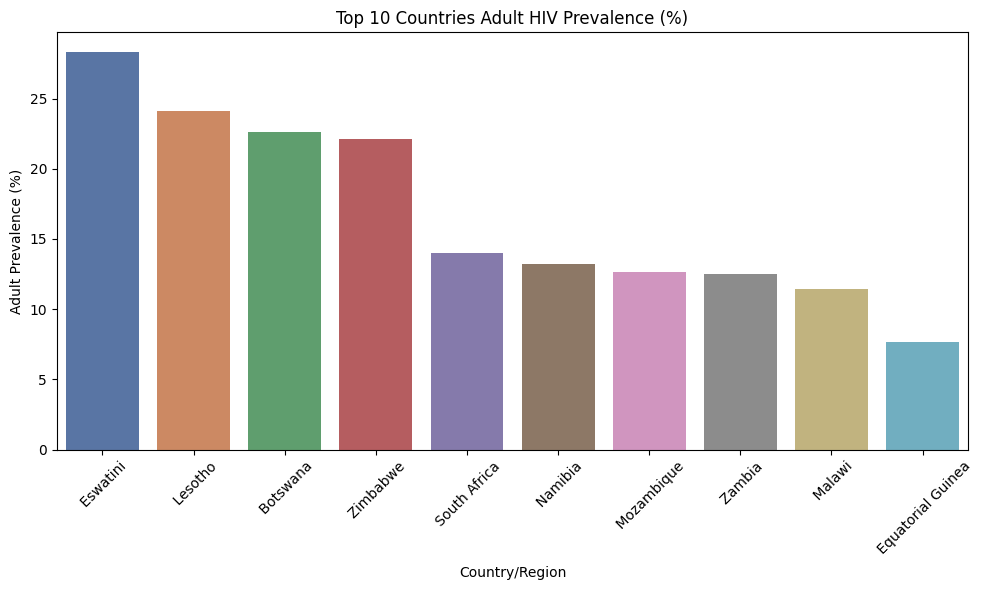

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=hivdata.nlargest(10, "Adult Prevalence (%)"),
    x="Country/Region",
    y="Adult Prevalence (%)",
    hue="Country/Region",  # Assigning 'Country/Region' to hue
    palette="deep",
)
plt.title("Top 10 Countries Adult HIV Prevalence (%)")
plt.xlabel("Country/Region")
plt.ylabel("Adult Prevalence (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


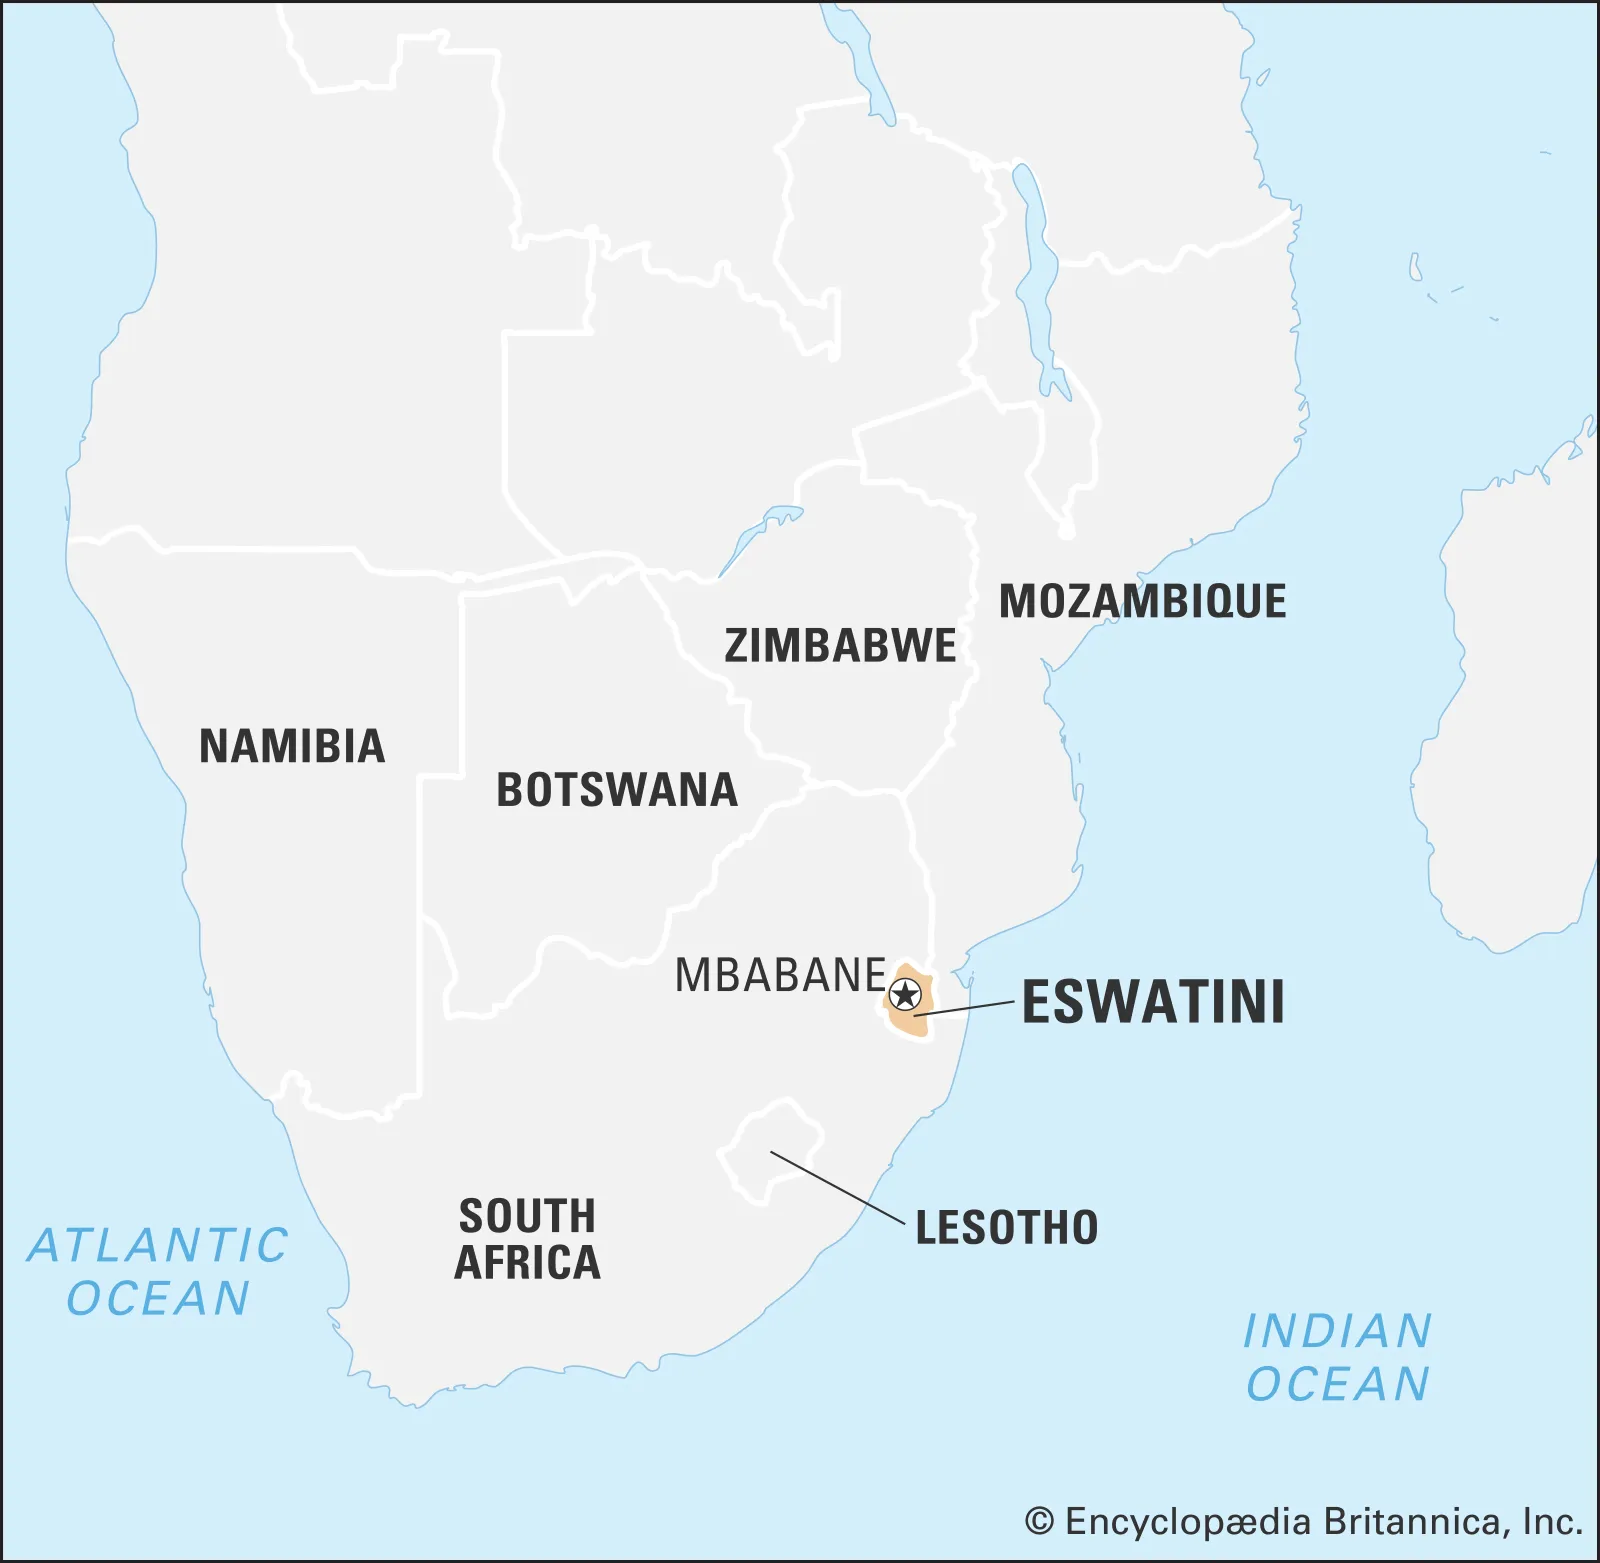

###*This analysis was meant to find and understand the prevelance of HIV/AIDS in the world. After running through the data for top countries with highest HIV/AIDS prevelance in the world, I noticed a patent where the top countries are all from the Africa continent as also shown through data in developmental aid and data pandas. The analysis will not be interesting if only shown data from Africa continent. I have decided to choose the top 5 countries while adding certain countries for the visualisation and comparison. The selected countries are based on these reasons:*

I have decided to add United States, India, Brazil, Thailand and Malaysia in the selected countries.

**United States** - Carries with it the issues that high-income countries face, such as healthcare inequities and persistent stigma. Despite the low frequency (0.3%), the United States has unique difficulties such as healthcare disparities and stigma. It highlights how high-income countries approach HIV differently from low-income nations. Lastly, who doesn't want to know about US's HIV/AIDS situation ✨

**India** - Low to middle-income country with limited resources, and its big population (second in the world) is vulnerable to a variety of epidemics that target high-risk groups. With its large population, India maintains a remarkably low adult prevalence of 0.2%, showing successful interventions despite resource constraints. This comparison with African nations emphasizes the effectiveness of focused health measures. Actually, I want to use China but the data was outdated and not completed.

**Brazil** - Have achieve a progressive government policies and equitable health care in keeping HIV prevalence low, making it a role model for middle-income countries. Brazil's progressive measures, particularly broad access to antiretroviral medication (ART), have contributed to its low prevalence, making it a model for middle-income countries. I also want to see the difference between North and South America situation in handling this epidemic.

**Thailand** - Show how a targeted public health prevention program, including high-risk groups, can help to minimize disease spread in a middle-income country. Known for pioneering HIV prevention initiatives targeting high-risk groups in Southeast Asia, Thailand has greatly decreased the spread of the disease despite being a middle-income country and a hub for sex tourism.

**Malaysia** - Malaysia's HIV/AIDS prevalence is relatively low, which reflects its dedicated prevention and treatment initiatives. Also, It is my country ❤

I have combined the top 5 countries in prevelance rate with those 5 selected countries.

###References:

https://www.developmentaid.org/news-stream/post/161014/hiv-aids-statistics-by-country

https://www.datapandas.org/ranking/hiv-rates-by-country



##Bar plot of top 5 countries with highest Adult HIV Prevelance + 5 selected countries

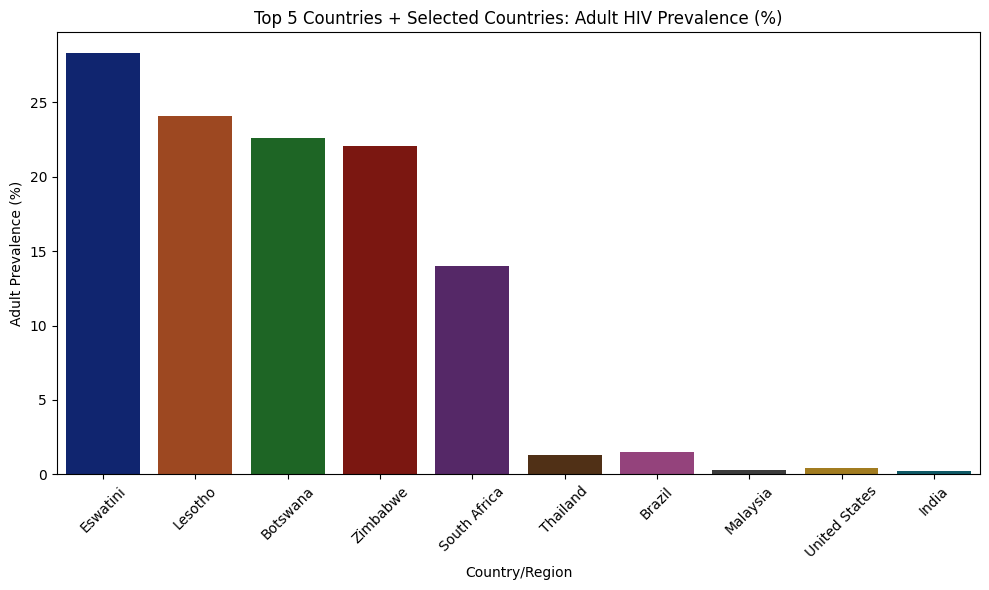

In [ ]:
# Ensure 'Malaysia' and other selected countries is in the dataset and there are no extra spaces in country names
hivdata["Country/Region"] = hivdata["Country/Region"].str.strip()

selected_countries = ["Malaysia", "United States", "India", "Brazil", "Thailand"]
specific_countries_data = hivdata[hivdata["Country/Region"].isin(selected_countries)]

# Get the top 5 countries by Adult Prevalence (%)
top_5 = hivdata.nlargest(5, "Adult Prevalence (%)")

# Combine top 5 with selected countries, ensuring no duplicates
filtered_data = pd.concat([top_5, specific_countries_data]).drop_duplicates()

# Plot with hue to customize the colors by country/region
plt.figure(figsize=(10, 6))
sns.barplot(
    data=filtered_data,
    x="Country/Region",
    y="Adult Prevalence (%)",
    hue="Country/Region",  # Assigning 'Country/Region' to hue
    palette="dark",
)
plt.title("Top 5 Countries + Selected Countries: Adult HIV Prevalence (%)")
plt.xlabel("Country/Region")
plt.ylabel("Adult Prevalence (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##Comparing Countries and Regions:

###**High prevalence in Southern Africa.**

Adult HIV prevalence rates in Eswatini, Lesotho, Botswana, Zimbabwe, and South Africa are more than 15%, with Eswatini at more than 25%. They are the world's highest.

###**Moderate Prevalence in Southeast Asia and South America**

Thailand and Brazil has a significantly lower frequency than Southern Africa, but slightly higher than the other nations in this comparison group. Thailand has long been the focus of preventative programs, which have helped keep rates low. Brazil, for instance, provides free ART through its public health system.

###**Low prevalence in developed and developing countries.**

Malaysia, the United States, and India all have relatively low prevalence rates (less than 5%). These countries have greater access to healthcare services, and several have established early preventative and education initiatives.

###**Reasons for high prevalence in Southern Africa include social and cultural factors.**

The current high HIV prevalence rates in Southern Africa, particularly in Eswatini, Lesotho, Botswana, Zimbabwe, and South Africa, allude to long-standing social, economic, and cultural difficulties. Deep-rooted behaviors such as polygamy and labor mobility enhance the risk of transmission, while gender inequity reduces women's ability to negotiate protective practices. Economic constraints worsen these problems by impeding access to healthcare and preventative measures.

**Polygamy and Multiple Concurrent Partnerships:** The prevalence of culturally acceptable activities such as polygamy or concurrent relationships indicates an increased risk of HIV infection.

**Gender Inequality:** Women in many Southern African countries have less control over their sexual habits, putting them at greater risk of infection.
Economic challenges:

**Poverty:** Insufficient economic resources limit access to healthcare, preventative programs, and antiretroviral medication.
Labour Migration: High levels of labour migration, such as to mines, lead to long periods of separation from families and a rise in risky sexual activity.

**Health Seeking Behavior:** Late diagnosis and limited access to treatment programs have historically exacerbated the epidemic.
The limited availability of anti-retroviral therapy during the early stages of the epidemic aggravated the crisis.

**Epidemic Momentum:** The Southern African outbreak began earlier and spread quicker than expected due to a lack of awareness and infrastructure preparedness at the time.

**Education and Stigma:** The socioeconomic impacts of HIV/AIDS stigma have delayed diagnosis and discouraged treatment in the region.
Inadequate information on preventative strategies like as condom use and safe sex.

###Other countries have stronger prevention programs, which may explain their lower prevalence rates.

In contrast, countries such as Brazil and Thailand demonstrate beneficial approaches. Brazil's universal ART program and Thailand's concentrated prevention efforts demonstrate how deliberate public health investments can go a long way in lowering HIV/AIDS prevalence and fatalities. They have spent extensively on public awareness programs and made ART widely available early in the epidemic. Brazil, for example, provides free ART through its public healthcare system.

Developed countries, such as the United States, have robust systems for early detection, prevention, and treatment, which prevents widespread spreading.

Policies aimed at high-risk groups, such as sex workers and intravenous drug users, have helped keep prevalence low in nations like India and Malaysia.


##References:

https://pdf.usaid.gov/pdf_docs/PNACL049.pdf





## Scatter Plot of Adult Prevelance, Number of People with HIV/AIDS and Annual Deaths from HIV/AIDS for Top 5 + Selected Countries

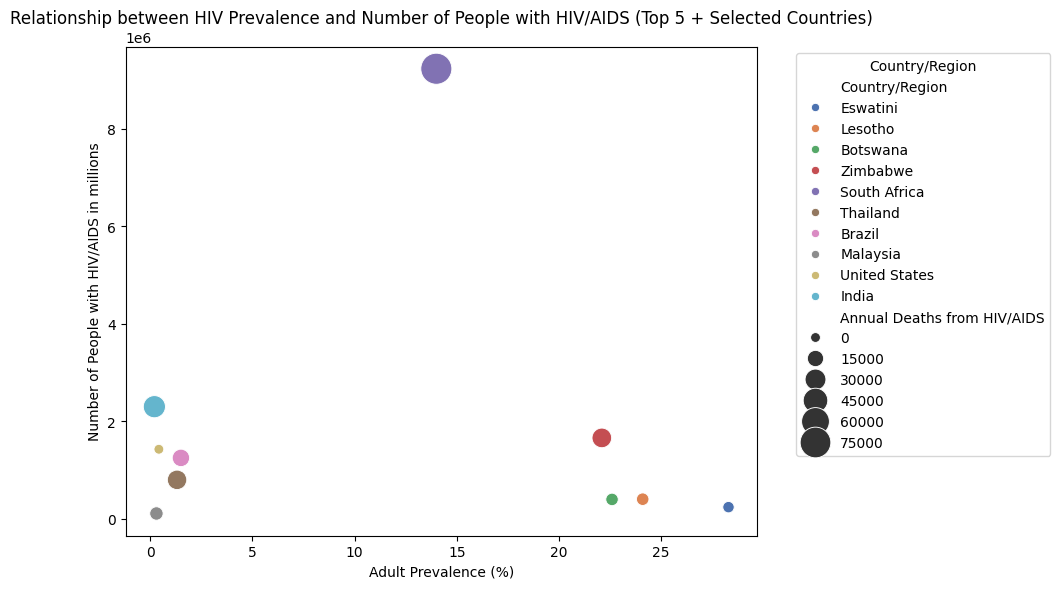

In [ ]:
# Scatter Plot for Top 5 + Selected Countries
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=filtered_data,
    x="Adult Prevalence (%)",
    y="Number of People with HIV/AIDS",
    size="Annual Deaths from HIV/AIDS",
    hue="Country/Region",
    palette="deep",
    sizes=(50, 500),
)
plt.title("Relationship between HIV Prevalence and Number of People with HIV/AIDS (Top 5 + Selected Countries)")
plt.xlabel("Adult Prevalence (%)")
plt.ylabel("Number of People with HIV/AIDS in millions")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Country/Region")
plt.tight_layout()
plt.show()

##Regional Patterns

Sub-Saharan Africa includes nations such as South Africa, Zimbabwe, Botswana, Lesotho, and Eswatini, which have the greatest incidence rates (10-27%), and are at the top of the graph. This demonstrates the disproportionate incidence of HIV in this region, which has been related to causes like:

Historically, there have been minimal health resources.
High transmission rates are attributed to socioeconomic and cultural factors.
ART was introduced late and is not yet widely available in some locations.
Younger populations are particularly vulnerable.

**Rest of the world:**

Brazil, Thailand, Malaysia, and the US have significantly lower prevalence (<2%). This reflects improved access to information, healthcare, and preventive measures like condom use, PrEP (pre-exposure prophylaxis), and harm reduction programmes.

##Outliers


South Africa has the highest prevalence rate (~19%) and total number of HIV/AIDS cases. The country remains the epicenter of the epidemic due to its big population compared to other countries with high prevalence.
Higher survival rates due to widespread access to ART.
Structural and behavioral determinants of HIV transmission exist.

India has the largest population living with HIV/AIDS (beside South Africa) (India also is the second highest populated country), despite a low prevalence of 0.3-0.8%. Prevention efforts in this country have been strong, while certain challenges remain in reaching sex workers, drug users, and migratory workers.

Eswatini has the highest prevalence on the chart, at approximately 27%, but the overall number of individuals living with HIV/AIDS is lower, reflecting the country's small population. The significant incidence implies a continuing public health issue in preventing transmission.

##Mortality Insights and Bubble Size:

**Eswatini, Lesotho, and Botswana:**

Despite the relatively small overall populations, this makes a significant contribution to the death burden, possibly indicating problems in either establishing universal ART coverage or addressing late-stage HIV presentation.
The countries with the highest annual mortality may be attributed to poor early detection or treatment cessation.

**South Africa:**

The enormous bubble for annual mortality represents both the impact of high prevalence and how the epidemic continues to harm this community despite ART adoption.

**India:**

The modest bubble size in India represents better mortality control in comparison to the total number of individuals living with HIV/AIDS, which is most likely due to increasing ART coverage and effective public health campaigns.

**United States**

If look closely United States mortality bubble is the smallest. Actually, this is because there was no data avalaible for Annual Death in United States. This indicate data limitations where the absence of data does not indicate that there are no deaths related to HIV in the United States, it only reflects incomplete or missing reporting.


##References:

https://worldpopulationreview.com/country-rankings/hiv-rates-by-country








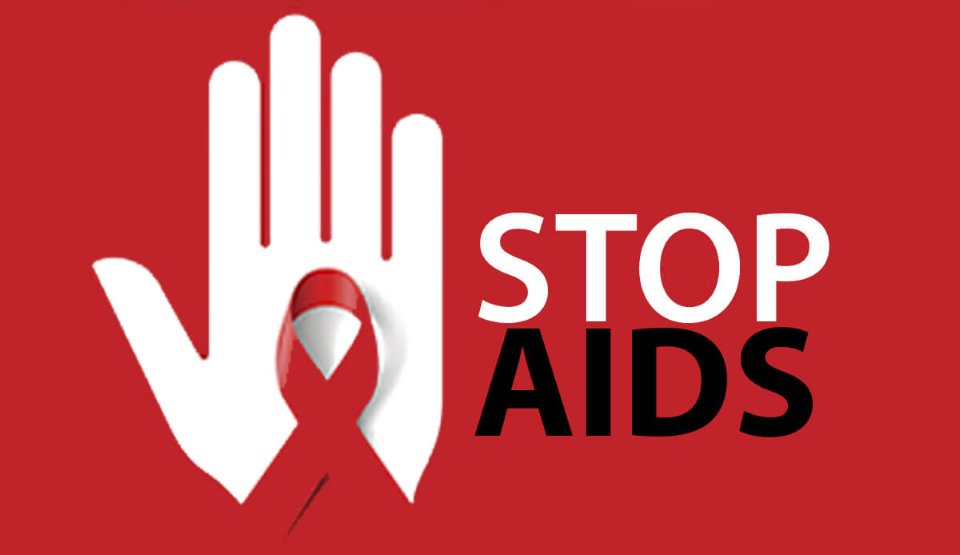

#**CONCLUSION**


##**Data Management**
The report highlights how crucial it is to make sure HIV prevalence data are up to date in order to properly inform policy and interventions. In order to reduce reliance on previous estimates and give decision-makers a more realistic foundation, focus should be directed toward real-time data collecting, especially in nations where this data is lacking or out-of-date. Historical trend analysis is also used to identify areas that require ongoing attention and resources as well as the long-term effects of previous efforts.

##**Prevelance Analysis**
Because of the enormous burden in Sub-Saharan Africa, such focused prevention measures are critical, particularly among women, youth, and high-risk populations. To reduce underlying HIV vulnerability, behavioral therapy must be combined with structural measures such as enhanced education and stigma reduction. Similar attention should be paid to expanding services for early detection and ART. In nations like Lesotho and Eswatini, ART coverage remains poor, resulting in high mortality rates and ongoing transmission. As a result, early detection and therapy will be effective in reversing these detrimental trends.

Furthermore, the social determinants of HIV are part of a much bigger landscape that includes poverty, inequality, and gender inequities, all of which must be addressed in order to reduce overall risk. Targeted interventions for the most vulnerable populations can help lower incidence and prevent further spread in countries like India, where the HIV load is concentrated.

##**Future Actions**
From a broader viewpoint, it is vital to maintain the focus on education, stigma reduction, and women's empowerment, particularly in high-burden regions such as Africa. Success cases, like as Thailand and Brazil, where public health initiatives successfully contained the epidemic, provide valuable lessons for other regions. Thus, by focusing on these areas, the global HIV response will make great progress in decreasing the epidemic's social and health consequences.